In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('first inten project.csv')

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data.drop('Booking_ID',axis=1,inplace=True)

### Checking Nulls

In [5]:
data.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

### Checking datatypes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [7]:
# Replace the type of meal with int
meal_mapping = {
    'Meal Plan 1': 1,
    'Not Selected': 0,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}
data['type of meal'] = data['type of meal'].map(meal_mapping)

room_type_mapping = {
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
}
data['room type'] = data['room type'].map(room_type_mapping)

market_segment_mapping = {
    'Offline': 1,
    'Online': 2,
    'Corporate': 3,
    'Aviation': 4,
    'Complementary': 5
}
data['market segment type'] = data['market segment type'].map(market_segment_mapping)

booking_status_mapping = {
    'Not_Canceled': 0,
    'Canceled': 1
}
data['booking status'] = data['booking status'].map(booking_status_mapping)

# Feature Engineering

In [8]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
# remove invalid dates
data.dropna(subset=['date of reservation'], inplace=True)

In [9]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,1,0,1,224,1,0,0,0,88.00,0,2015-10-02,0
1,1,0,1,3,0,0,1,5,2,0,0,0,106.68,1,2018-11-06,0
2,2,1,1,3,1,0,1,1,2,0,0,0,50.00,0,2018-02-28,1
3,1,0,0,2,1,0,1,211,2,0,0,0,100.00,1,2017-05-20,1
4,1,0,1,2,0,0,1,48,2,0,0,0,77.00,0,2018-04-11,1


In [10]:
data.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

### split 'date of reservation' to year, month & day features

In [11]:
data['year'] = data['date of reservation'].dt.year
data['month'] = data['date of reservation'].dt.month
data['day'] = data['date of reservation'].dt.day
data = data.drop('date of reservation', axis=1)
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day
0,1,1,2,5,1,0,1,224,1,0,0,0,88.00,0,0,2015,10,2
1,1,0,1,3,0,0,1,5,2,0,0,0,106.68,1,0,2018,11,6
2,2,1,1,3,1,0,1,1,2,0,0,0,50.00,0,1,2018,2,28
3,1,0,0,2,1,0,1,211,2,0,0,0,100.00,1,1,2017,5,20
4,1,0,1,2,0,0,1,48,2,0,0,0,77.00,0,1,2018,4,11


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36248 non-null  int64  
 1   number of children        36248 non-null  int64  
 2   number of weekend nights  36248 non-null  int64  
 3   number of week nights     36248 non-null  int64  
 4   type of meal              36248 non-null  int64  
 5   car parking space         36248 non-null  int64  
 6   room type                 36248 non-null  int64  
 7   lead time                 36248 non-null  int64  
 8   market segment type       36248 non-null  int64  
 9   repeated                  36248 non-null  int64  
 10  P-C                       36248 non-null  int64  
 11  P-not-C                   36248 non-null  int64  
 12  average price             36248 non-null  float64
 13  special requests          36248 non-null  int64  
 14  booking sta

## checking the outliers

In [13]:
def plot_outliers(data):
  
    # Select only numerical columns
    numerical_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns
    
    # Set the size of the plot
    plt.figure(figsize=(15, 8))
    
    # Create a box plot for each numerical column
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Adjust the layout
        sns.boxplot(data=data[col],palette='rainbow',orient='h')
        plt.title(f'Box Plot of {col}')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: Fu

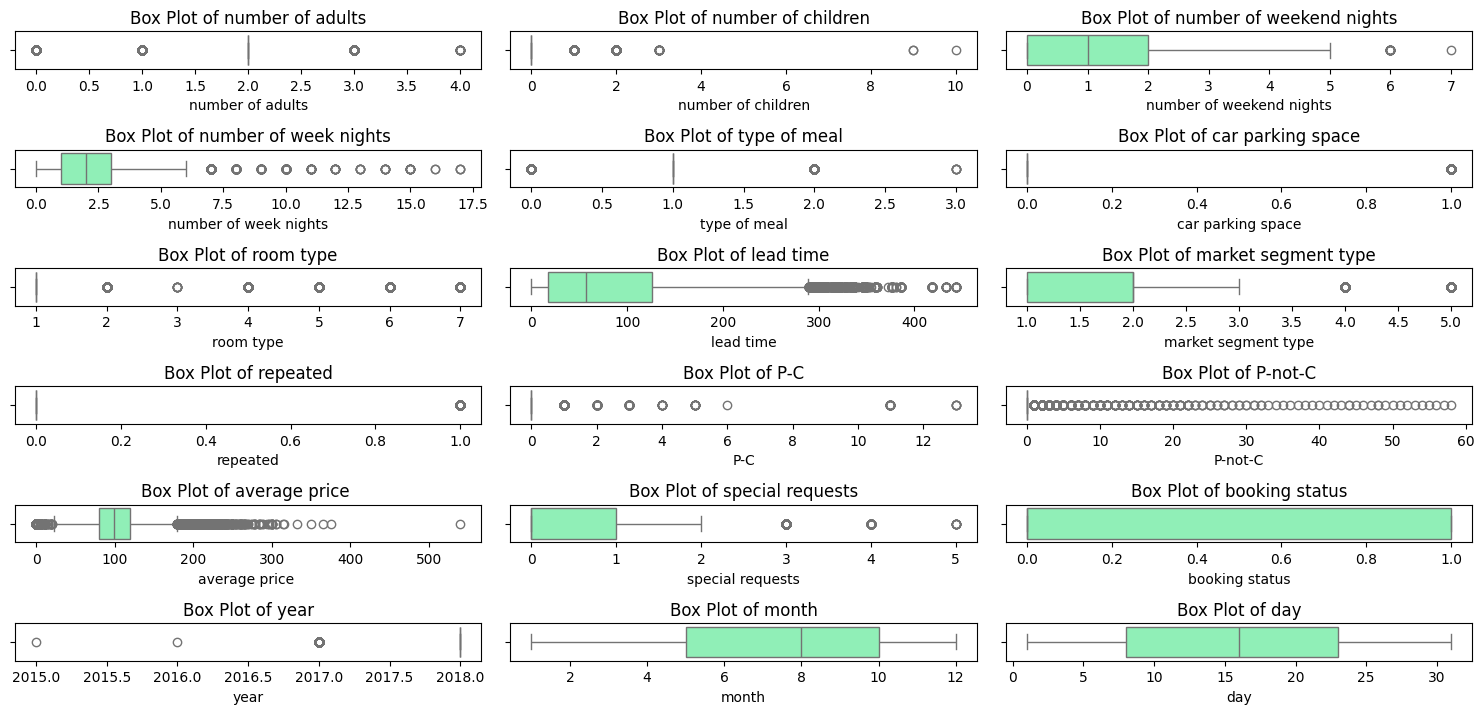

In [14]:
plot_outliers(data)

# Removing Outliers

In [15]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'booking status',
       'year', 'month', 'day'],
      dtype='object')

In [16]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [17]:
columns = ['number of adults', 'number of children', 'number of weekend nights', 
           'number of week nights', 'car parking space', 'lead time', 'repeated', 
           'P-C', 'P-not-C', 'special requests', 'average price ']

for column in columns:
    data = remove_outliers_iqr(data, column)

C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col],palette='rainbow',orient='h')
C:\Users\yasse\AppData\Local\Temp\ipykernel_10072\3745747988.py:12: Fu

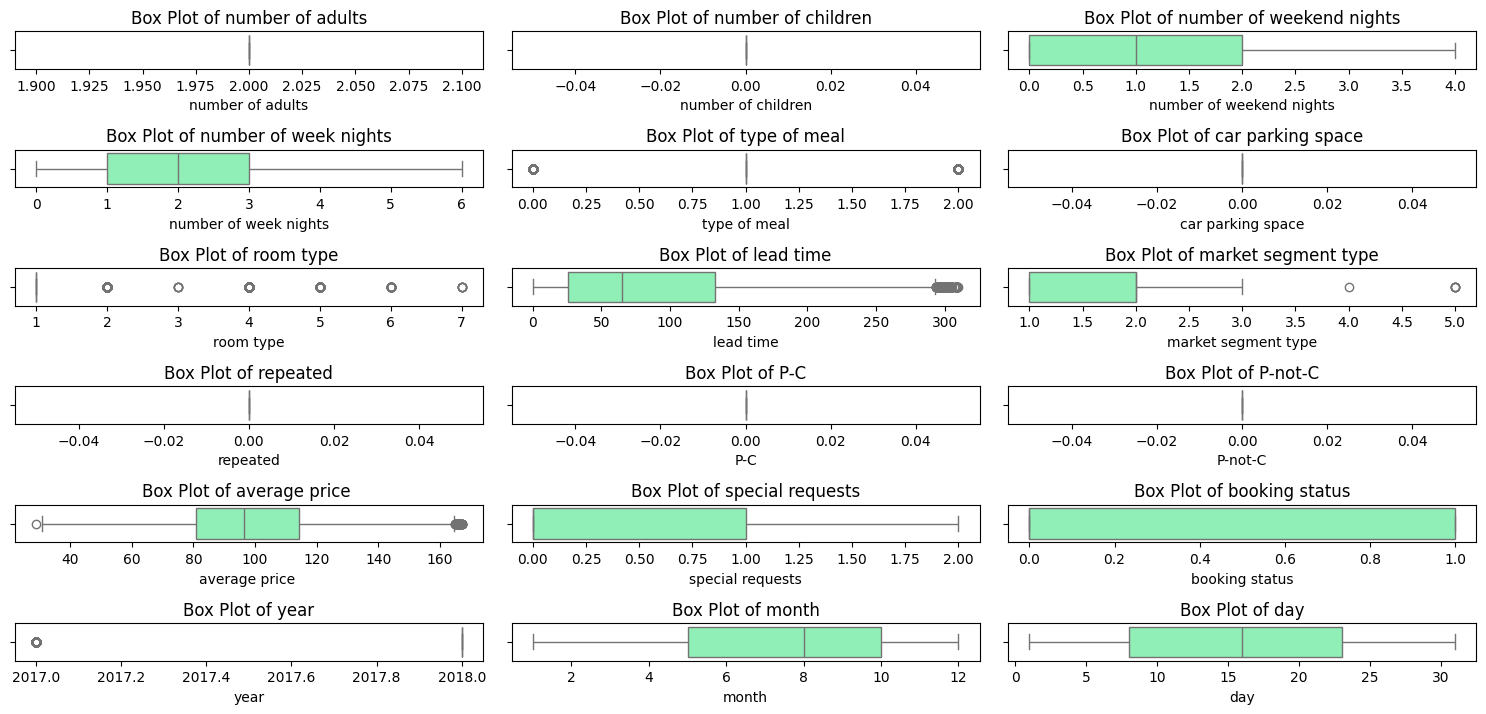

In [18]:
plot_outliers(data)

## split the data to training, validation and testing


In [19]:
from sklearn.model_selection import train_test_split


data_input = data.drop('booking status', axis=True)
data_output = data['booking status']

X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=2)

print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (14189, 17)
X_test =  (6989, 17)
y_train =  (14189,)
y_test =  (6989,)


### Applying Logistic regresion

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


Logistic_reg = LogisticRegression(random_state=20 , max_iter=1000)
Logistic_reg.fit(X_train, y_train) 
y_pred = Logistic_reg.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

accuracy_score:  0.7959650879954214
[[4006  531]
 [ 895 1557]]


### Applying KNN & Finding the best K acuracy

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
 
def KNN(k, train_X,train_y,test_X,test_y):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(train_X,train_y)
    pred = knn.predict(test_X)
    accuracy = accuracy_score(test_y,pred)
    conf_matrix = confusion_matrix(test_y,pred)
    result = {'k': k , 'accuracy' : accuracy ,  'conf_matrix' : conf_matrix }

    return result

K : 17
Accuracy : 0.792
Confusion Matrix : 
[[4144  393]
 [1061 1391]]


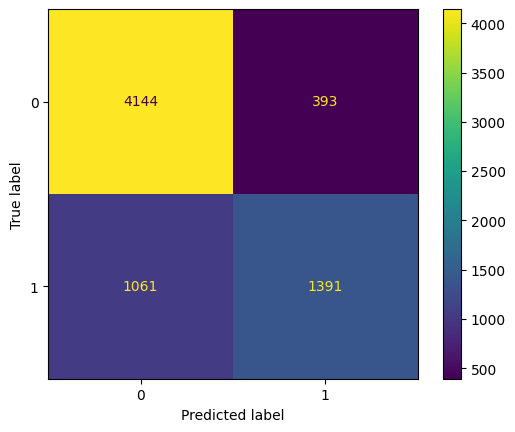

In [22]:
k_scores = []
for i in range(1,115,2):
    k_result = KNN(i,X_train,y_train,X_test,y_test)
    k_scores.append(k_result)

best_k_scores = max(k_scores, key=lambda x: x['accuracy'])
print(f"K : {best_k_scores['k']}")
print(f"Accuracy : {best_k_scores['accuracy']:.3f}")
print("Confusion Matrix : ")
print(best_k_scores['conf_matrix'])
ConfusionMatrixDisplay(best_k_scores['conf_matrix']).plot()
plt.show()    
